<a href="https://colab.research.google.com/github/ShukrohBello/Machine-Learning-Zoomcamp/blob/main/02-regression/homework2_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regression Homework for MLZoomcamp

> The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

In [1]:
import pandas as pd
import numpy as np

### Data Prep

In [2]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

In [3]:
#df = pd.read_csv('/content/car_fuel_efficiency.csv')

In [4]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [5]:
df = pd.read_csv(url)

In [6]:
df.head(5)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [7]:
#df.columns

In [8]:
#df.columns = df.columns.str.lower().str.replace(' ','_')


In [9]:
df.head(3)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341


In [10]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [11]:
df.dtypes == 'object'

engine_displacement    False
num_cylinders          False
horsepower             False
vehicle_weight         False
acceleration           False
model_year             False
origin                  True
fuel_type               True
drivetrain              True
num_doors              False
fuel_efficiency_mpg    False
dtype: bool

In [12]:
df.dtypes[df.dtypes == 'object']

origin        object
fuel_type     object
drivetrain    object
dtype: object

In [13]:
df.dtypes[df.dtypes == 'object'].index

Index(['origin', 'fuel_type', 'drivetrain'], dtype='object')

In [14]:
obj_strings = list(df.dtypes[df.dtypes == 'object'].index)
obj_strings

['origin', 'fuel_type', 'drivetrain']

In [15]:
for col in obj_strings:
  df[col] = df[col].str.lower().str.replace(' ','_')

In [16]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369


### Exploratory Data Analysis

In [17]:
for col in df.columns:
  print(col)
  print(df[col].head())
  print(df[col].unique()[:5])
  print(df[col].nunique())
  print()

engine_displacement
0    170
1    130
2    170
3    220
4    210
Name: engine_displacement, dtype: int64
[170 130 220 210 190]
36

num_cylinders
0    3.0
1    5.0
2    NaN
3    4.0
4    1.0
Name: num_cylinders, dtype: float64
[ 3.  5. nan  4.  1.]
14

horsepower
0    159.0
1     97.0
2     78.0
3      NaN
4    140.0
Name: horsepower, dtype: float64
[159.  97.  78.  nan 140.]
192

vehicle_weight
0    3413.433759
1    3149.664934
2    3079.038997
3    2542.392402
4    3460.870990
Name: vehicle_weight, dtype: float64
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

acceleration
0    17.7
1    17.8
2    15.1
3    20.2
4    14.4
Name: acceleration, dtype: float64
[17.7 17.8 15.1 20.2 14.4]
162

model_year
0    2003
1    2007
2    2018
3    2009
4    2009
Name: model_year, dtype: int64
[2003 2007 2018 2009 2008]
24

origin
0    europe
1       usa
2    europe
3       usa
4    europe
Name: origin, dtype: object
['europe' 'usa' 'asia']
3

fuel_type
0    gasoline
1  

In [18]:
columns_to_keep = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

df_req = df[columns_to_keep]
display(df_req.head())

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

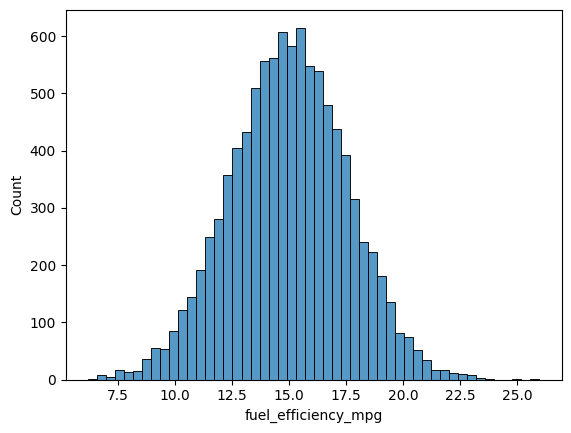

In [20]:
sns.histplot(df_req.fuel_efficiency_mpg, bins = 50)

#### Question 1: There's one column with missing values. What is it?

In [21]:
df_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


In [22]:
# Missing Values
df_req.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

> horsepower is the column with missing values

In [23]:
df_req.shape

(9704, 5)

In [24]:
len(df_req)

9704

#### Question 2: What's the median (50% percentile) for variable 'horsepower'? [49, 99, 149, 199]

In [25]:
df_req.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [26]:
# Initializing Descriptive Analysis
df_req.describe(percentiles = [.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
engine_displacement,9704.0,199.708368,49.455319,10.000000,10.000000,140.000000,170.000000,200.000000,230.000000,260.000000,280.000000,310.000000,380.000000
horsepower,8996.0,149.657292,29.879555,37.000000,37.000000,111.000000,130.000000,149.000000,170.000000,188.000000,200.000000,218.000000,271.000000
vehicle_weight,9704.0,3001.280993,497.894860,952.681761,952.681761,2366.705284,2666.248985,2993.226296,3334.957039,3639.429331,3819.762217,4177.957153,4739.077089
model_year,9704.0,2011.484027,6.659808,2000.000000,2000.000000,2002.000000,2006.000000,2012.000000,2017.000000,2021.000000,2022.000000,2023.000000,2023.000000
fuel_efficiency_mpg,9704.0,14.985243,2.556468,6.200971,6.200971,11.688767,13.267459,15.006037,16.707965,18.259461,19.150022,20.882064,25.967222


In [27]:
mid_hp = df_req['horsepower'].median()
print(f"The median (50th percentile) of horsepower is: {mid_hp}")

The median (50th percentile) of horsepower is: 149.0


In [28]:
import numpy as np

In [29]:
#OR  Median using numpy
mid = np.median(df_req['horsepower'])
mid

nan

In [30]:
n = len(df_req)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = int(n * 0.6)

In [31]:
n, n_val + n_test + n_train

(9704, 9702)

> Doesn't add up to a whole so will calculate n_train another way.

In [32]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [33]:
n, n_val + n_test + n_train

(9704, 9704)

In [34]:
#SHUFFLING THE DATASET - because the initial dataset is present
# sequentially which will affect the data split in (val, test, train)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df_req.iloc[idx]

In [35]:
# PREPARING THE DATASET
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [36]:
df_train.head(3)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822


In [37]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [38]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [39]:
df_train.head(3)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822


In [40]:
# PREPARING THE LABELS
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

### Linear Regression

In [41]:
df_train.iloc[10]

engine_displacement     240.000000
horsepower              159.000000
vehicle_weight         2916.987921
model_year             2001.000000
Name: 10, dtype: float64

In [50]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006
...,...,...,...,...
5819,260,139.0,2606.972984,2009
5820,280,132.0,4004.214323,2014
5821,210,152.0,2500.175687,2020
5822,250,154.0,2254.313245,2002


### Question 3: Fill NA mean vs zero

In [57]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def prepare_X(df_req):
    df_fill = df_req.fillna(fillna_value)
    X = df_fill.values
    return X

In [43]:
# def train_linear_regression(X, y):
#     ones = np.ones(X.shape[0])
#     X = np.column_stack([ones, X])

#     XTX = X.T.dot(X)
#     XTX_inv = np.linalg.inv(XTX)
#     w = XTX_inv.dot(X.T).dot(y)

#     return w[0], w[1:]

# def prepare_X(df_req, fillna_value):
#     df_req = df_req.fillna(fillna_value)
#     X = df_req.values
#     return X

In [58]:
def rmse(y, y_pred):
    error = y - y_pred
    mse = (error ** 2).mean()
    return np.sqrt(mse)

#### Replace with Mean

In [59]:
mean = df_train.horsepower.mean()

X_train = prepare_X(df_train, fillna_value=mean)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=mean)
y_pred = w_0 + X_val.dot(w)

rmse_mean = round(rmse(y_val, y_pred),2)
print(f"RMSE when filling with mean: {rmse_mean}")

RMSE when filling with mean: 0.46


#### Replace with Zero

In [60]:
X_train = prepare_X(df_train, fillna_value=0)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=0)
y_pred = w_0 + X_val.dot(w)

rsme_zero = np.round(rmse(y_val, y_pred), 2)
print(f"RMSE when filling with zero: {rsme_zero}")

RMSE when filling with zero: 0.52


### Question 4
    Now let's train a regularized linear regression.
    For this question, fill the NAs with 0.
    Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
    Use RMSE to evaluate the model on the validation dataset.
    Round the RMSE scores to 2 decimal digits.
    Which r gives the best RMSE?
    If there are multiple options, select the smallest r.
    Options:
      0
      0.01
      1
      10
      100

### Best Regularization

In [62]:
#FUNCTION FOR TRAINING LINEAR REGRESSION:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0]) #regularization
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [63]:
# def prepare_X(df_req):
#     df_num = df_req.copy()
#     return df_num.fillna(0).values

In [64]:
for r in [0, 0.01, 1, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    print(r, rmse_val)

0 0.5173782638841185
0.01 0.5171115525775559
1 0.5222348802092528
10 0.5229812979636569
100 0.5230636233819926


### Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))

    What's the value of std?

    0.001
    0.006
    0.060
    0.600
> Note: *Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.*

In [65]:
#rmses = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    # n = len(df)

    # n_val = int(0.2 * n)
    # n_test = int(0.2 * n)
    # n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)


    df_train = df.iloc[idx[:n_train]].copy()
    df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
    df_test = df.iloc[idx[n_train+n_val:]].copy()


    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w_0 + X_val.dot(w)

    result = rmse(y_val, y_pred)
    print(s, result)

    #rmses.append(result)

TypeError: can't multiply sequence by non-int of type 'float'